In [169]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [170]:
df = pd.read_csv("googleplaystore.csv")
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [171]:
df = df.dropna()

In [172]:
df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(float)

/var/folders/m7/snhszr993kscmjx9dwlff1lm0000gn/T/ipykernel_57205/2495500731.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [173]:
df = df[df['Size'] != 'Varies with device']
df.reset_index(drop=True, inplace=True)

In [174]:
df['Size'] = df['Size'].apply(lambda x: float(x.replace('k', '')) / 1000 if 'k' in x else float(x.replace('M', '')))


In [175]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [176]:
df.describe(include="all").T 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
App,7723,7023,ROBLOX,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,7723,33,FAMILY,1616,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,7723.0,NaN,NaN,NaN,4.173935,0.544638,1.0,4.0,4.3,4.5,5.0
Reviews,7723,4669,2,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,7723.0,NaN,NaN,NaN,22.970456,23.449629,0.0085,5.3,14.0,33.0,100.0
Installs,7723,19,"1,000,000+",1301,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,7723,2,Free,7146,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,7723.0,NaN,NaN,NaN,1.128169,17.408036,0.0,0.0,0.0,0.0,400.0
Content Rating,7723,6,Everyone,6166,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genres,7723,112,Tools,633,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [177]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

## Bar plot (çaprazlama grafikleri dahil) çizdiriniz

Text(0.5, 1.0, 'Count of App in Each category')

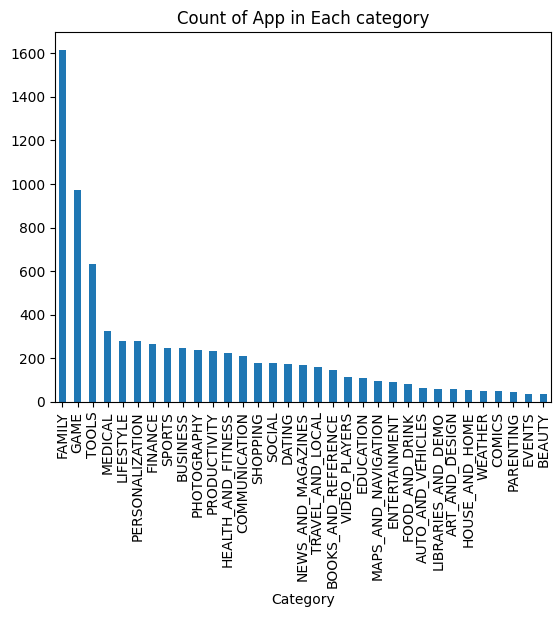

In [178]:
(df["Category"]
 .value_counts()
 .plot.bar()
 .set_title("Count of App in Each category"))

<Axes: xlabel='Type', ylabel='Reviews'>

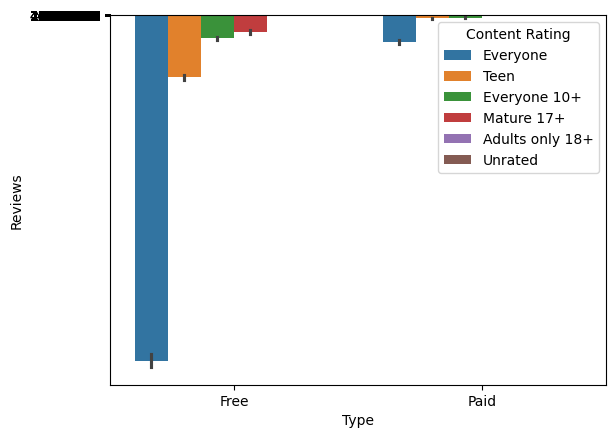

In [179]:
# Create a grouped bar plot with Seaborn
sns.barplot(x="Type", y="Reviews", hue="Content Rating", estimator=sum, data=df, orient='v')

## Box plot (çaprazlama grafikleri dahil) çizdiriniz


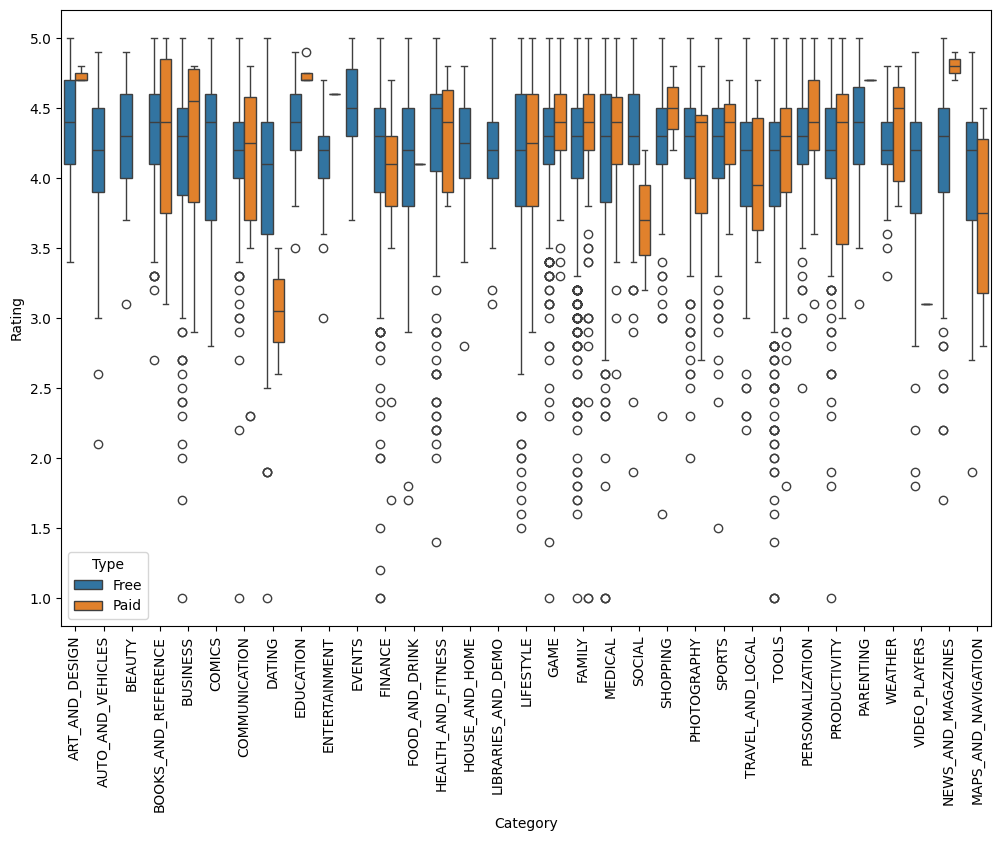

In [180]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="Category",y="Rating", hue='Type', data=df, )
plt.xticks(rotation=90)
plt.show()

## Histogram yogunluk Grafikleri (çaprazlama grafikleri dahil) çizdiriniz


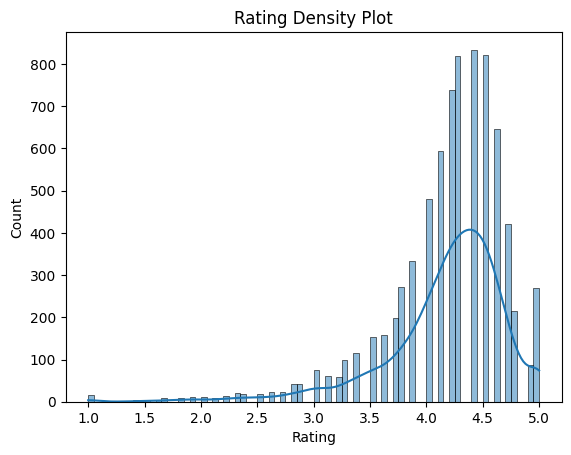

In [181]:
sns.histplot(df['Rating'], kde=True)

plt.title('Rating Density Plot')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

## Violin grafikleri (çaprazlama grafikleri dahil) çizdiriniz


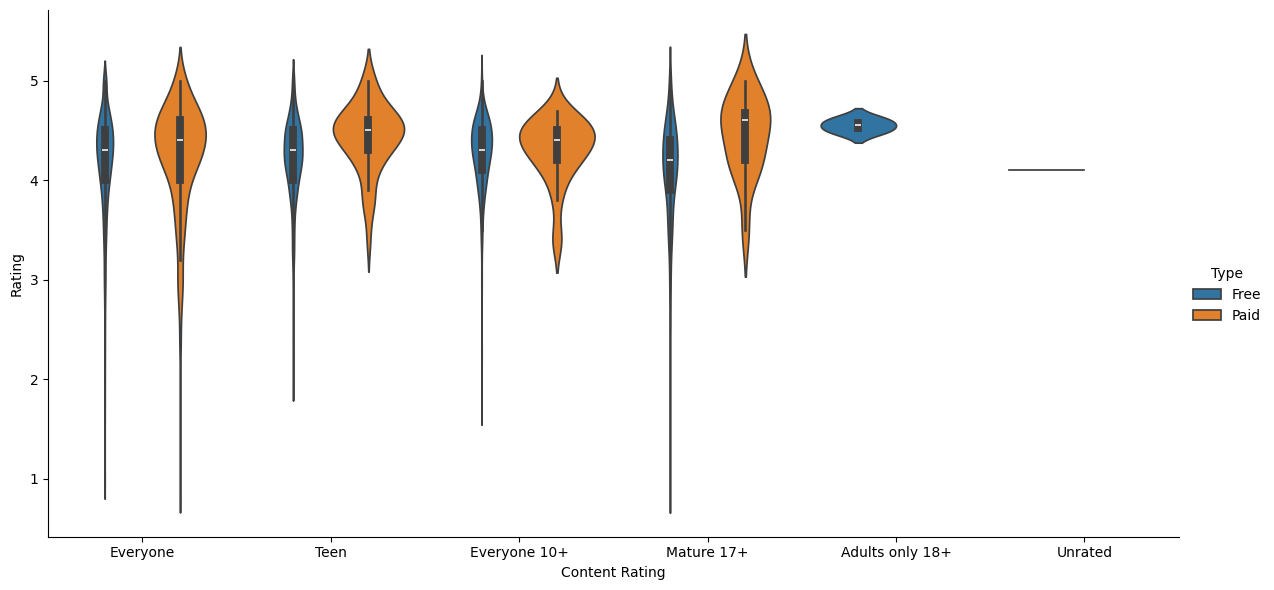

In [182]:
sns.catplot(x="Content Rating", y="Rating",hue="Type", kind="violin", data=df, height=6, aspect=2)


## Scatter plot(çaprazlama grafikleri dahil) çizdiriniz


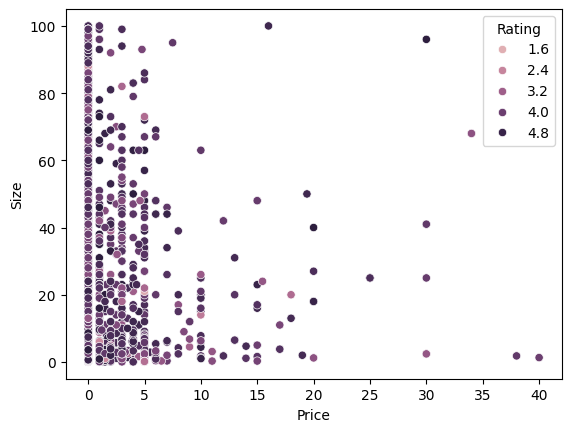

In [183]:

filtered_df = df[df['Price'] < 50]
sns.scatterplot(x="Price", y="Size", hue="Rating", data=filtered_df)
plt.show()

In [184]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Scatter plot matrisi çizdiriniz


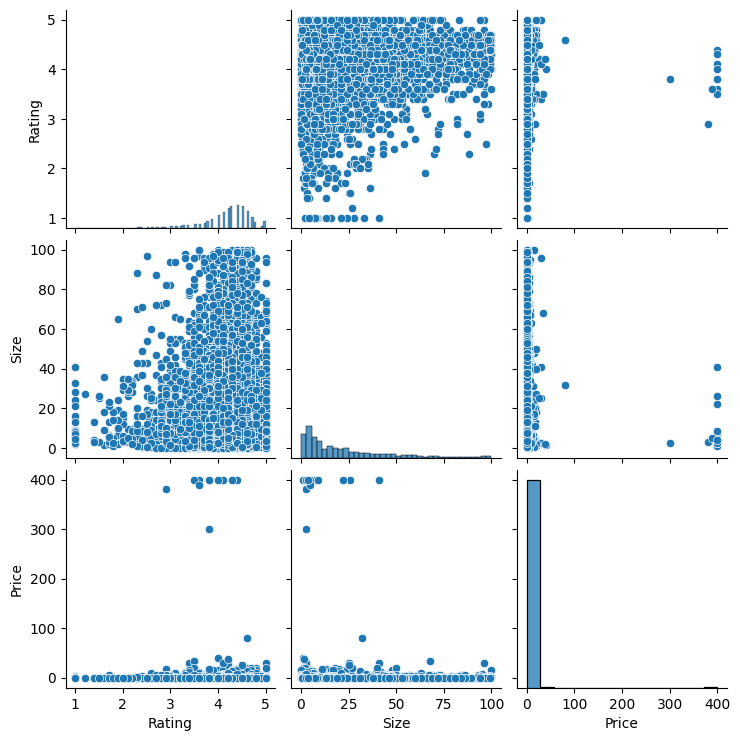

In [185]:
sns.pairplot(df)

## Heatmap grafigi çizdiriniz


<Axes: >

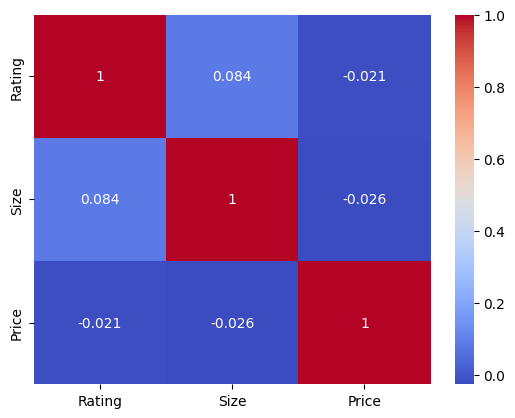

In [186]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')


## Çizgi grafik(çaprazlama grafikleri dahil) çizdiriniz. (uygun bir data yok ise baska bir dataset ile calisin)


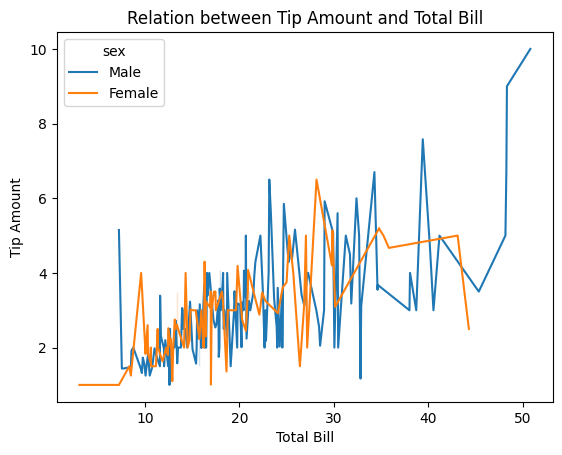

In [187]:
tips = sns.load_dataset("tips")
sns.lineplot(x="total_bill", y="tip", data=tips, hue="sex")
plt.title("Relation between Tip Amount and Total Bill")
plt.xlabel("Total Bill")
plt.ylabel("Tip Amount")
plt.show()


## Analizlerinizi/Gozlemlerinizi bir sonuc raporu ile aciklayin.

Average rating in Parenting App is lower in Paid Versions, which means there might be a market gap to fill but regarding the app count, demand might be low when compared with other categories.

Most of the ratings are between 4 and 5 , it means to be successful, rating is important

